In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

In [ ]:
train =pd.read_csv('drive/My Drive/digit-recognizer/train.csv')
test =pd.read_csv('drive/My Drive/digit-recognizer/test.csv')

In [ ]:
train.shape

(42000, 785)

In [ ]:
train_x,train_y=train.iloc[:,1:].values,train.iloc[:,0].values


In [ ]:
test_x.shape

(28000, 783)

# Standard scaler

In [ ]:
train_x=train_x/255
test_x=test_x/255

In [ ]:
train_X=train_x.reshape(train_x.shape[0],28,28,1)


In [ ]:
test=test.iloc[:,:].values.reshape(test.iloc[:,:].values.shape[0],28,28,1)
test.shape

(28000, 28, 28, 1)

In [ ]:
train_X.shape

(42000, 28, 28, 1)

In [ ]:
train_X[1].shape

(28, 28, 1)

In [ ]:
train_y

array([1, 0, 1, ..., 7, 6, 9])

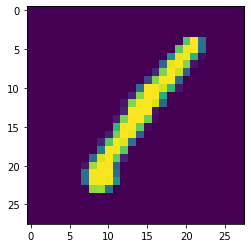

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28,28))
plt.show()

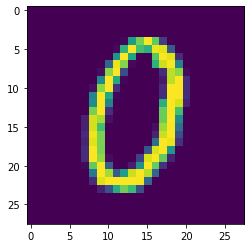

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_X[5].reshape(28,28))
plt.show()

In [ ]:
from tensorflow import keras

In [ ]:
train_y=keras.utils.to_categorical(train_y)

In [ ]:
train_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_X,train_y,batch_size=32,epochs=8,validation_split=0.1)

Epoch 1/8
1182/1182 [==============================] - 41s 32ms/step - loss: 0.4093 - accuracy: 0.8720 - val_loss: 0.0840 - val_accuracy: 0.9719
Epoch 2/8
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0632 - val_accuracy: 0.9783
Epoch 3/8
1182/1182 [==============================] - 36s 30ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 4/8
1182/1182 [==============================] - 36s 30ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 5/8
1182/1182 [==============================] - 36s 30ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 6/8
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0413 - val_accuracy: 0.9881
Epoch 7/8
1182/1182 [==============================] - 37s 32ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0529 - val_ac

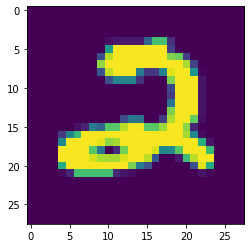

In [ ]:
plt.imshow(test[0].reshape(28,28))
plt.show()

In [ ]:
ypred=model.predict_classes(test[0].reshape(-1,28,28,1))[0]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("prediction : ",ypred)

prediction :  2


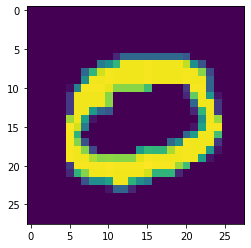

prediction :  0


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
plt.imshow(test[1].reshape(28,28))
plt.show()
ypred=model.predict_classes(test[1].reshape(-1,28,28,1))[0]
print("prediction : ",ypred)